# CONVOLUTIONAL NEURAL NETWORK

In this notebook We will build a CNN for classifying the hand written digits.

In [1]:
# importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## LOADING THE DATA 

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print("Traning Set")
print(train.shape)
print("Test set")
print(test.shape)

Traning Set
(42000, 785)
Test set
(28000, 784)


In the train data the first column is label and each image is 28*28 pixel by pixel image. Then from 2nd column to last column that is 784 columns represent the pixel values of each image. There are totally 42000 images in the train data set.

The test data is same but only the label column is not present. the size of test is 28000

In [3]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 In the train data and test data there are no missing values. So there is no need to clean the data

In [5]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [6]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

## Train and Test Matrices  

In [7]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

X_test=test.iloc[:,:].values

print("Train data shape : (%d,%d)"% X.shape)
print("Train Labels : (%d,)"% y.shape)
print("Test Data shape : (%d,%d)"% X_test.shape)

Train data shape : (42000,784)
Train Labels : (42000,)
Test Data shape : (28000,784)


## VISUALIZATION OF THE DATA

In [8]:
def show_image(image, shape, label="", cmp=None):
    img = np.reshape(image,shape)
    plt.imshow(img,cmap=cmp, interpolation='none')
    plt.title(label)

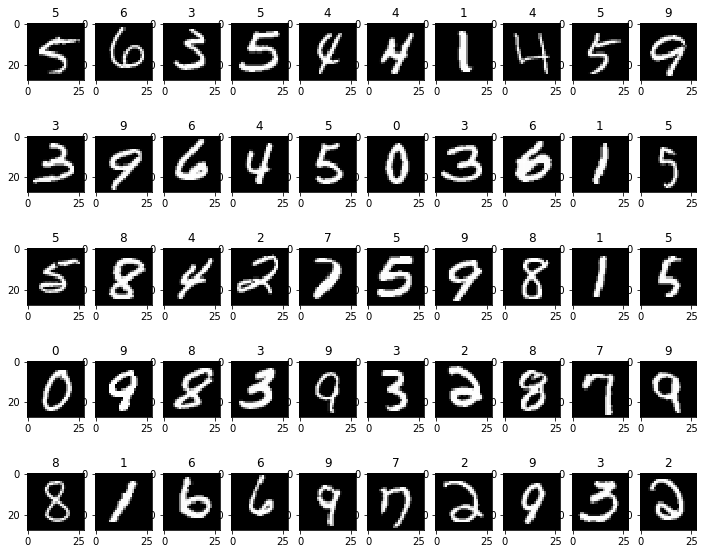

In [9]:
%matplotlib inline
plt.figure(figsize=(12,10))

z, x = 5,10
for i in range(0,(z*x)):
    plt.subplot(z, x, i+1)
    k = np.random.randint(0,X.shape[0],1)[0]
    show_image(X[k,:],(28,28), y[k], cmp="gist_gray")
plt.show()

## NORMALIZATION 

We normalize the train data and test data and we do this by dividing the data by 255. This is equal to (max-min) of the pixel values

In [10]:
X=X/255
X_test=X_test/255
print("min value :%d"% np.min(X))
print("max value :%d"% np.max(X))

min value :0
max value :1


## RESHAPING 

Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

In [11]:
X=X.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

print("Train data shape : (%d,%d,%d,%d)"% X.shape)
print("Test Data shape : (%d,%d,%d,%d)"% X_test.shape)

Train data shape : (42000,28,28,1)
Test Data shape : (28000,28,28,1)


## ONE HOT ENCODING

We have actually classes named 0 to 9. But When we are training the data using neural network we have to make the dummies of the classes.It is really useful for classifying.

For Example:

y=1 is changed to y=[0 1 0 0 0 0 0 0 0 0]

y=2 is changed to y=[0 0 1 0 0 0 0 0 0 0]

and so on.

In [12]:
# first we will print y's
print(y[0:10])

[1 0 1 4 0 0 7 3 5 3]


For one hot encoding we will use the onehotencoder from sklearn preprocessing library

In [13]:
from sklearn.preprocessing import OneHotEncoder
x=y.reshape(y.size,1)
onehotencoder=OneHotEncoder(categorical_features=[0])
y=onehotencoder.fit_transform(x).toarray().astype(int)
print("SHAPE : (%d,%d)\n" %y.shape)
print(y[0:10,:])

SHAPE : (42000,10)

[[0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]]


## CROSS VALIDATION SET 

The cross-validation is a techinique used for measure the accuracy and visualizing overfitting.

Here we will split the data into training set and cross validation set with size of cross-validation as 10% of total data

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_cross,y_train,y_cross=train_test_split(X,y,test_size=0.1,random_state=42)

print("Train Size (%d,%d,%d,%d) \n"% X_train.shape)
print("Validation Size (%d,%d,%d,%d) \n"% X_cross.shape)
print("Train Label Size (%d,%d) \n"% y_train.shape)
print("Validation Label Size (%d,%d) \n"% y_cross.shape)

Train Size (37800,28,28,1) 

Validation Size (4200,28,28,1) 

Train Label Size (37800,10) 

Validation Label Size (4200,10) 



We can get a better sense for one of these examples by visualising the image and looking at the label.

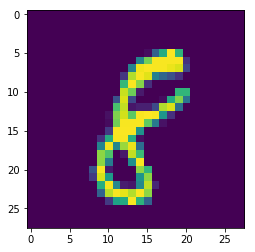

In [15]:
plt.imshow(X_train[0][:,:,0])

(28, 28)


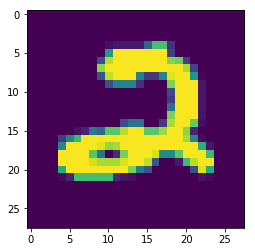

In [16]:
plt.imshow(X_test[0][:,:,0])
print(X_test[0][:,:,0].shape)

## MODEL

For Neural network building i am using python keras library (tensorflow backend)

In [17]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.preprocessing.image  import ImageDataGenerator

Using TensorFlow backend.
/home/suchith/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Activation Function:
Exist a lot of types of activations functions, but in this model we'll use the ReLu (Rectifier Linear Function) for hidden layers and Softmax function for output layer

Softmax function is same as sigmoid function but softmax is for more varaibles that is it is generalization of sigmoid function on a n-dimensional vector

## Model

I have used two convolutional layer with 32 filters each and each filter transforms a part of the image (defined by the kernel size) using the kernel filter.

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value and i have chosen the pool size as (2,2).

Before Flattening i made that layer as dropout with 0.25 as keep probability

In the end i used the features in one fully-connected (Dense) layers which is just artificial an neural networks (ANN). It contained 512 neurons in the hidden layer and it is an dropout layer with 0.2 as keep probability. 

With this I got an accuracy of 99.483

In [18]:
# Initialising the CNN
model=Sequential()

# Convolution layer
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))

# Max pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# adding another Convolution Layer
model.add(Conv2D(64,(3,3),activation='relu'))

# adding Max pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# model dropout layer
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Full connection 
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

# summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               819712    
__________

In [19]:
# compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               819712    
__________

## DATA AUGMENTATION

In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.



In [20]:
datagen=ImageDataGenerator(rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1)

datagen.fit(X_train)

## FITTING THE MODEL

In [21]:
epoch=2
batch=100
sp_epoch=X_train.shape[0]

In [22]:
model.fit_generator(datagen.flow(X_train,y_train,batch_size=batch),epochs=epoch,validation_data=(X_cross,y_cross),steps_per_epoch=sp_epoch)

Epoch 1/2
37800/37800 [==============================] - 9453s 250ms/step - loss: 0.0416 - acc: 0.9872 - val_loss: 0.0186 - val_acc: 0.9948
Epoch 2/2
37800/37800 [==============================] - 8127s 215ms/step - loss: 0.0217 - acc: 0.9935 - val_loss: 0.0280 - val_acc: 0.9948


## PREDICTION

In [23]:
y_pred=model.predict_classes(X_test)
print(y_pred.shape)

28000/28000 [==============================] - 17s 623us/step
(28000,)


## VISUALIZING THE TEST RESULTS

Here we are visulizing the 20 random test images. The title of each image is the predicted label

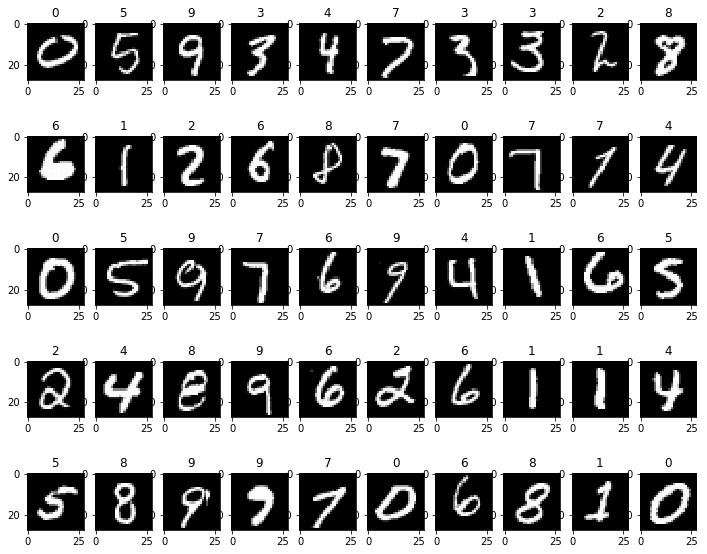

In [24]:
%matplotlib inline
plt.figure(figsize=(12,10))

z, x = 5,10
for i in range(0,(z*x)):
    plt.subplot(z, x, i+1)
    k = np.random.randint(0,X_test.shape[0],1)[0]
    show_image(X_test[k,:],(28,28), y_pred[k], cmp="gist_gray")
plt.show()

In [25]:
imageid=np.linspace(1,28000,28000).astype(int)
print(imageid,imageid.shape,type(imageid))

[    1     2     3 ..., 27998 27999 28000] (28000,) <class 'numpy.ndarray'>


In [26]:
ans=pd.DataFrame({
    "ImageId":imageid,
    "Label":y_pred
})
ans.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [27]:
ans.to_csv("CNN.csv",index=False)                # got 99.542.
print("Done")   

Done
